<a href="https://colab.research.google.com/github/hsiuliwang/algorithm_test/blob/master/%E7%8E%8B%E7%B6%89%E5%AD%8B_%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：</br>
先讓使用者寫入一個陣列與K值</br>
運用任意一個排序法，將陣列排序</br>
(在此使用插入排序)</br>
而我找到快速解法(參考以下說明)</br>
插入排序</br>
由於是要找 k 个最大的數，所以没有必要對所有數进行完整的排序。每次只保留 k 個當前最大的數就可以，然后每次對新來的元素跟當前 k 个數中最小的數比较，新元素大的话則插入到數组中，否則跳過。循還結束後數組中最小的數即是我們要找到第 k 大的數


In [45]:
#程式

###參考:https://blog.csdn.net/Strive_0902/article/details/82940456

arr = input('請輸入n個數字:')      #手動輸入n個數字文字說明
num = [int(n) for n in arr.split()]  #存成一串列(不限五個)
print("\n你輸入的數列:")
print(num)

K = input('請輸入K值(尋找第K大的元素)：')

K=int(K)
#print(K)
def Find_Kth_max(array,k):  ###取陣列與K值
    for i in range(1,k):
        for j in range(i,0,-1):
            if array[j] > array[j-1]:  ###判斷是否有大於
                array[j],array[j-1] = array[j-1],array[j]  ###交換
            else:
                pass
    for i in range(k,len(array)):
        if array[i] > array[k-1]:
            array[k-1] = array[i]
            for j in range(k-1,0,-1): 
                if array[j] > array[j-1]: ###判斷是否有大於
                    array[j],array[j-1] = array[j-1],array[j] ###交換
                else:
                    pass  ###沒則跳過
    return array[k-1]
print("從此Array中，第K大的元素為")          
print(Find_Kth_max(num,K))

請輸入n個數字:2 3 4 55 6 65 444

你輸入的數列:
[2, 3, 4, 55, 6, 65, 444]
請輸入K值(尋找第K大的元素)：3
從此Array中，第K大的元素為
55


第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：
思考換硬幣問題，如:5元還可換成2個2元和1個1元</br>
https://www.itread01.com/content/1546351221.html</br>
https://www.codeleading.com/article/1900799687/</br>

In [59]:
#程式
###參考:https://www.codeleading.com/article/1900799687/
###上面這個參考是關於換硬幣問題


###目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?
a=int(input())
count=0
for h in range(a,0,-1):  ###判斷找h(10)
  for i in range(a,0,-1):  ###i(5)
    for j in range(a,0,-1):  ###j(2)
      for k in range(a,0,-1):  ###k(1)
         
        if h*10+i*5+j*2+k==a:  #判斷條件
              print("10:{}, 5:{}, 2:{}, 1:{},total:{}".format(h,i,j,k,h+i+j+k))
              count+=1

print("有%d種方法"%count)

21
10:1, 5:1, 2:2, 1:2,total:6
10:1, 5:1, 2:1, 1:4,total:7
有2種方法


第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


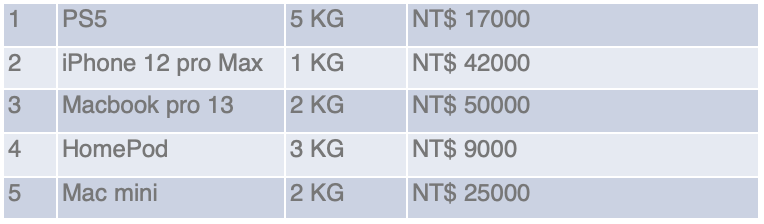








解題想法：

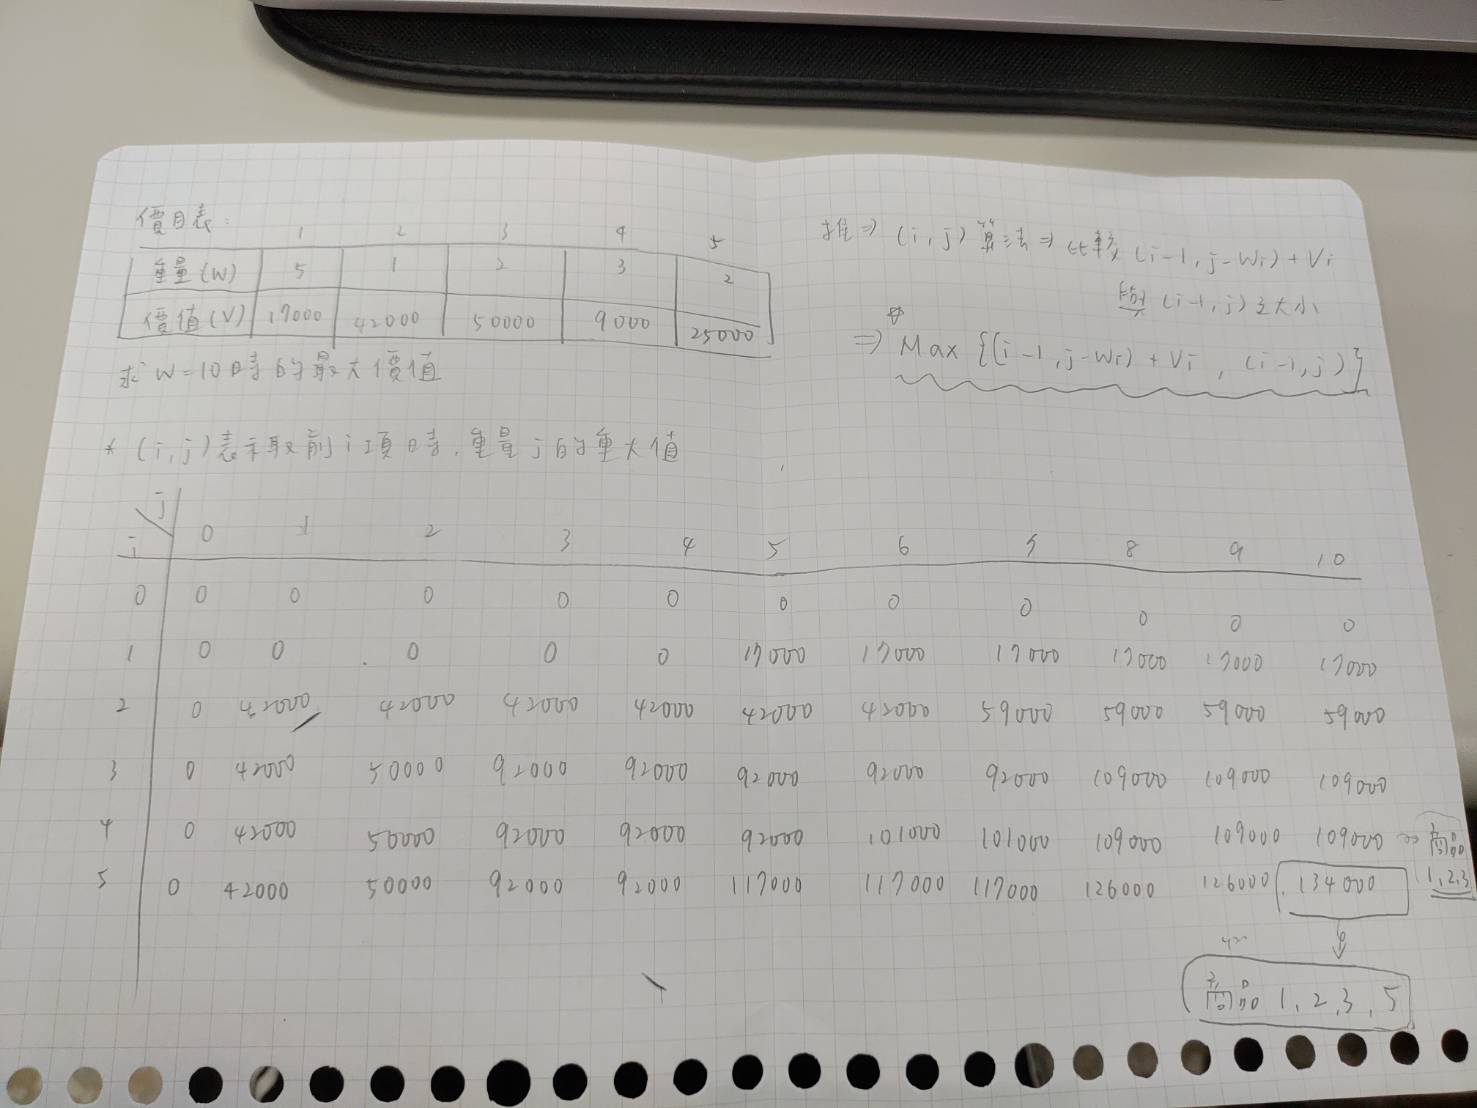

In [30]:
#程式
##0/1背包問題(不可分割)

def bag(n,c,w,v):
	res=[[0 for j in range(c+1)] for i in range(n+1)]
	for j in range(c+1):
		res[0][j]=0
	for i in range(1,n+1):		
		for j in range(1,c+1):			
			res[i][j]=res[i-1][j]
			if j>=w[i-1] and res[i][j]<res[i-1][j-w[i-1]]+v[i-1]:
				res[i][j]=res[i-1][j-w[i-1]]+v[i-1]
				print("物品","總重",[i,j],"價值",res[i-1][j-w[i-1]],"+",v[i-1],"共",res[i][j])
		print(res[i])
	return res

def show(n,c,w,res):
	print('最大價值為:',res[n][c])
	
if __name__=='__main__':
	n=5
	c=10
	w=[5, 1, 2, 3, 2]
	v=[17000, 42000, 50000, 9000, 25000]
	res=bag(n,c,w,v)
	show(n,c,w,res)
 

print("---------------------------------------")
print("怎麼裝才能帶走最有價值的商品")
print("其產品之編號，單價，總價，背包總重量為")
print("商品1,NT$17000，5kg")
print("商品2,NT$42000，1kg")
print("商品3,NT$50000，2kg")
print("商品5,NT$25000，2kg")
print("背包總重量為10kg")
show(n,c,w,res)

物品 總重 [1, 5] 價值 0 + 17000 共 17000
物品 總重 [1, 6] 價值 0 + 17000 共 17000
物品 總重 [1, 7] 價值 0 + 17000 共 17000
物品 總重 [1, 8] 價值 0 + 17000 共 17000
物品 總重 [1, 9] 價值 0 + 17000 共 17000
物品 總重 [1, 10] 價值 0 + 17000 共 17000
[0, 0, 0, 0, 0, 17000, 17000, 17000, 17000, 17000, 17000]
物品 總重 [2, 1] 價值 0 + 42000 共 42000
物品 總重 [2, 2] 價值 0 + 42000 共 42000
物品 總重 [2, 3] 價值 0 + 42000 共 42000
物品 總重 [2, 4] 價值 0 + 42000 共 42000
物品 總重 [2, 5] 價值 0 + 42000 共 42000
物品 總重 [2, 6] 價值 17000 + 42000 共 59000
物品 總重 [2, 7] 價值 17000 + 42000 共 59000
物品 總重 [2, 8] 價值 17000 + 42000 共 59000
物品 總重 [2, 9] 價值 17000 + 42000 共 59000
物品 總重 [2, 10] 價值 17000 + 42000 共 59000
[0, 42000, 42000, 42000, 42000, 42000, 59000, 59000, 59000, 59000, 59000]
物品 總重 [3, 2] 價值 0 + 50000 共 50000
物品 總重 [3, 3] 價值 42000 + 50000 共 92000
物品 總重 [3, 4] 價值 42000 + 50000 共 92000
物品 總重 [3, 5] 價值 42000 + 50000 共 92000
物品 總重 [3, 6] 價值 42000 + 50000 共 92000
物品 總重 [3, 7] 價值 42000 + 50000 共 92000
物品 總重 [3, 8] 價值 59000 + 50000 共 109000
物品 總重 [3, 9] 價值 59000 + 50000 共 109000


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

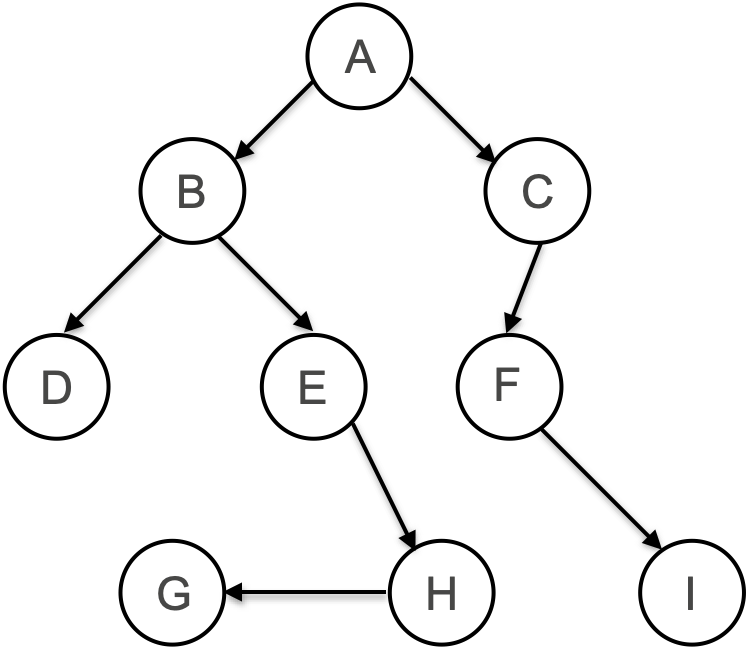

解題想法：</br>
深度優先搜尋法步驟：</br>
1.由樹根 ( 或圖的某⼀點當成根 ) 當做起點開始探尋</br>
2.先探尋邊 ( edge ) 上未搜尋的⼀節點 ( vertex or node ) ，並盡可能深入搜索</br>
3.直到該節點的所有邊上節點都已探尋就回溯 ( backtracking ) 到前⼀個節點</br>
4.重覆探尋未搜尋的節點，直到找到⽬的節點或遍尋全部節點

</br>
廣度優先搜尋法步驟：</br>
1.由樹根 ( 或圖的某⼀點當成根 ) 當做起點開始探尋</br>
2.⼀開始搜尋該節點、再接著搜尋所有與該點相鄰的節點</br>
3.接下來再搜尋下⼀層的節點，並延續步驟2，直到所有的節點都搜尋過為⽌


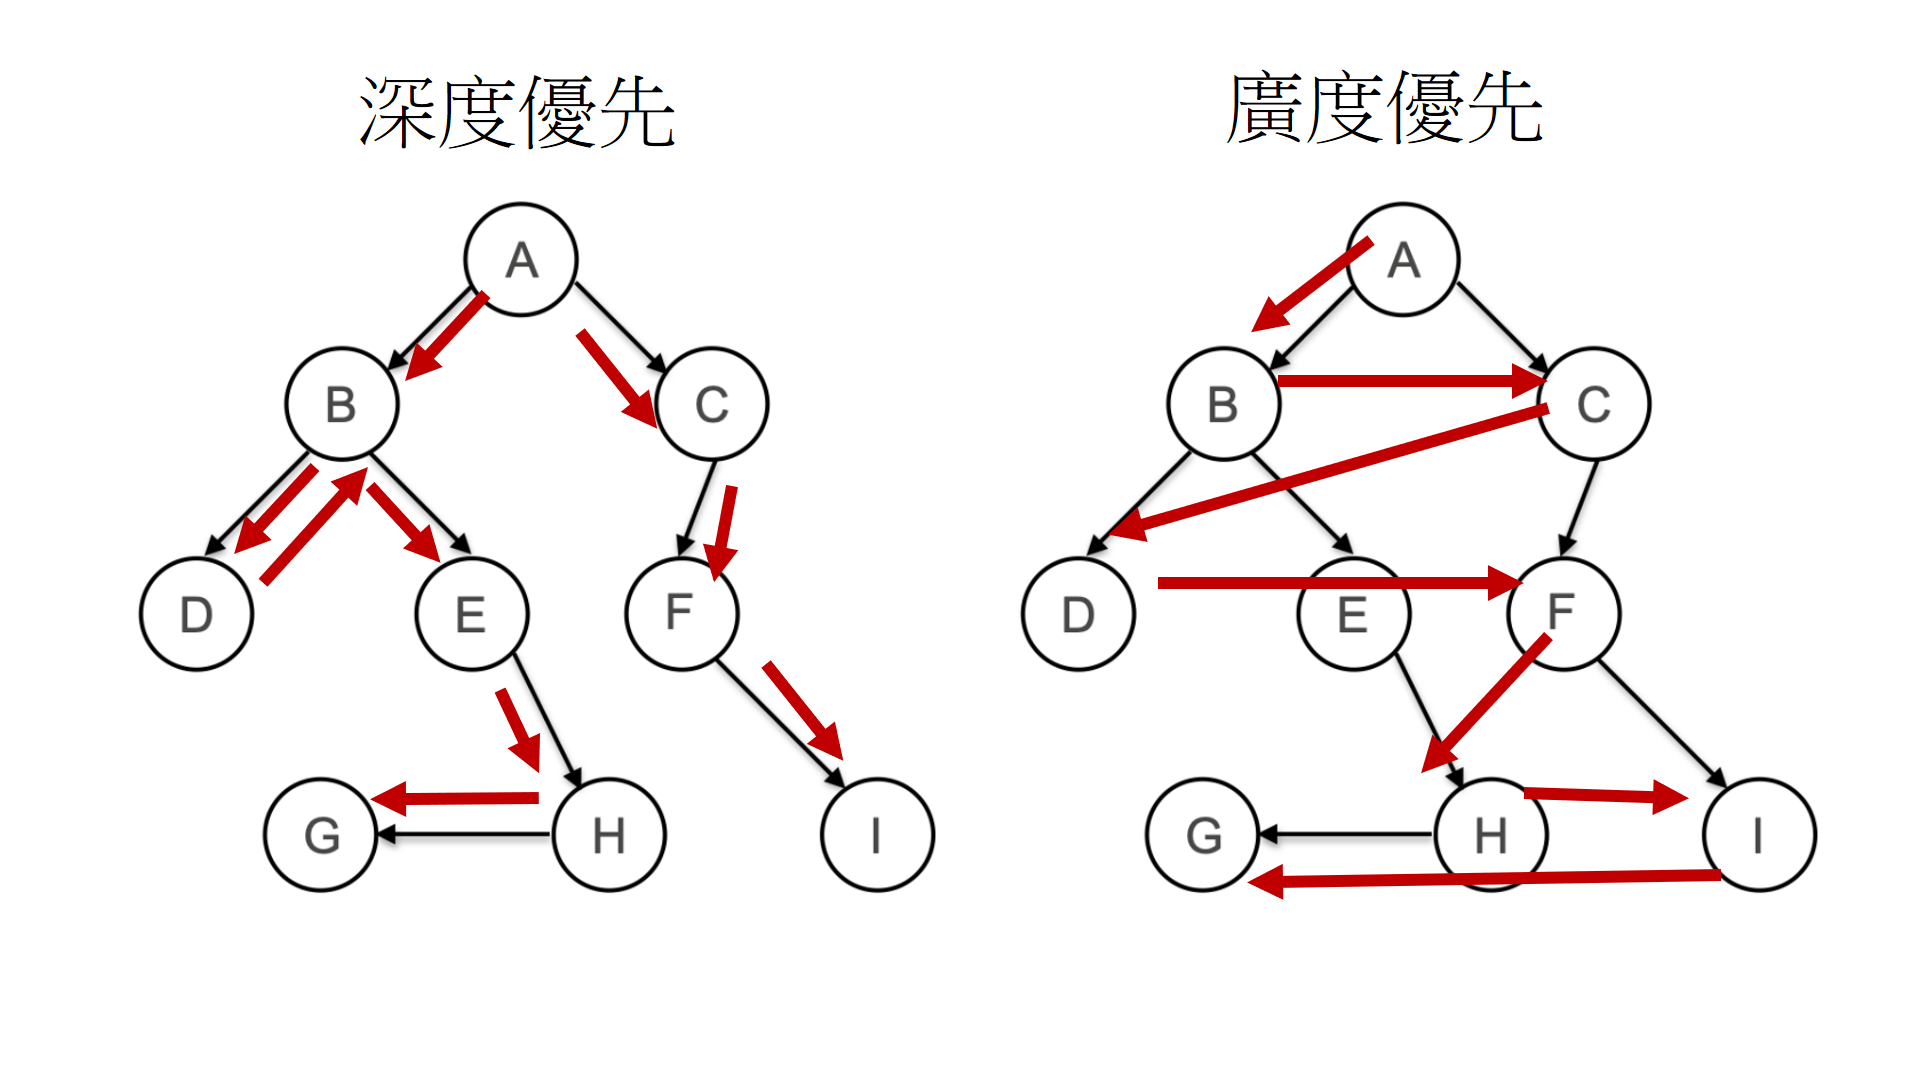

In [22]:
#程式
####各種解法
'''參考來源:
https://super9.space/archives/1562
https://gist.github.com/travishen/761e8028fda4b257e7fe6f24d77e980a
https://gist.github.com/travishen/a24313e320c250bfbc9255bc728fa30d'''

######深度優先搜尋(DFS)
class Node:
    
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.neighbors = []
        self.predecessor = None  # use in shortest path
        
    def __repr__(self):
        return 'Node(name={})'.format(self.name)

class DFS:
    """
    For BFS, use queue; For DFS, use stack / recursion(os stack)
    """
    def __init__(self, start):
        self.start = start
        
    def traversal(self):
        interface = self.stack()
        interface(self.start)
        return self.result
        
    def stack(self):
        self.result = []
        def interface(node):
            self.result.append(node)            
            node.visited = True
            for n in node.neighbors:
                if not n.visited:
                    interface(n) 
        return interface

na = Node('A')
nb = Node('B')
nc = Node('C')
nd = Node('D')
ne = Node('E')
nf = Node('F')
ng = Node('G')
nh = Node('H')
ni = Node('I')

na.neighbors = [nb, nc]
nb.neighbors = [nd, ne]
ne.neighbors = [nh]
nh.neighbors = [ng]

nc.neighbors = [nf]
nf.neighbors = [ni]

print("深度優先搜尋(DFS)走訪有向圖中的所有節點")
print("順序為:")
dfs = DFS(na)

for node in dfs.traversal():
    print(node)


深度優先搜尋(DFS)走訪有向圖中的所有節點
順序為:
Node(name=A)
Node(name=B)
Node(name=D)
Node(name=E)
Node(name=H)
Node(name=G)
Node(name=C)
Node(name=F)
Node(name=I)


In [20]:
####廣度優先搜尋法(BFS)
###參考:https://f74461036.pixnet.net/blog/post/352335176

graph = {
    "A":["B","C"],
    "B":["D","E"], 
    "C":["F"],
    "D":[],
    "E":["H"],
    "F":["I"],
    "G":[], 
    "H":["G"],
    "I":[],       
}
def BFS(graph,s):
    queue = []
    queue.append(s)
    seen = set()
    seen.add(s)
    while(len(queue)>0):
        vertex = queue.pop(0)
        nodes = graph[vertex]
        for w in nodes:
            if w not in seen:
                queue.append(w)
                seen.add(w)
        print(vertex)
print("廣度優先搜尋法(BFS)走訪有向圖中的所有節點")
print("順序為:")
BFS(graph,'A')


廣度優先搜尋法(BFS)走訪有向圖中的所有節點
順序為:
A
B
C
D
E
F
H
I
G


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

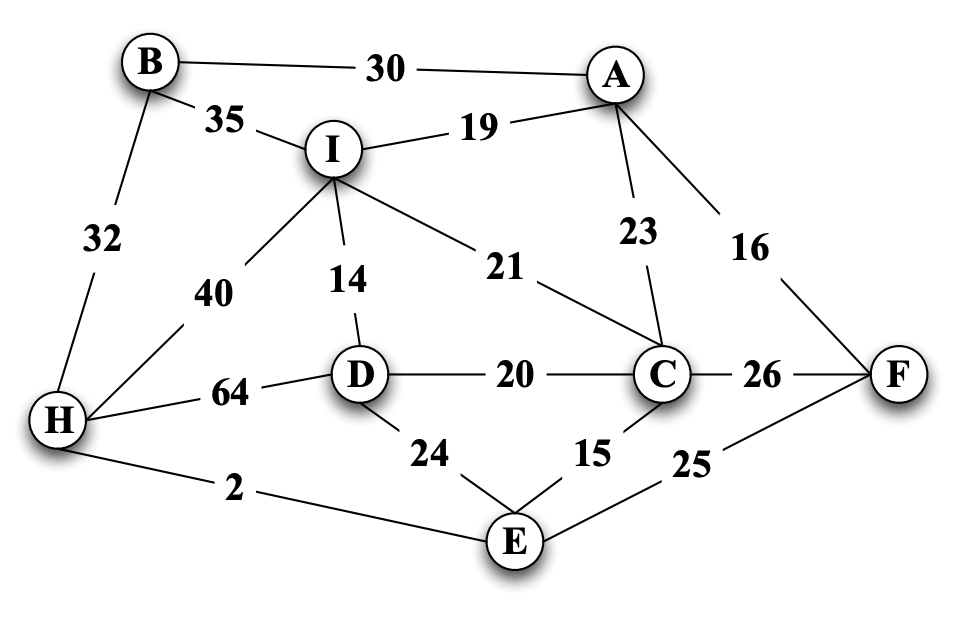

解題想法：
'''最小生成樹是什麼？ 
給定一個連接的和無向的圖，該圖的生成樹是一個子圖，它是一棵樹，並將所有頂點連接在一起。單個圖可以具有許多不同的生成樹。加權，連接和無向圖的最小生成樹（MST）或最小權重生成樹是權重小於或等於其他所有生成樹的權重的生成樹。生成樹的權重是賦予生成樹的每個邊緣的權重之和。
最小生成樹有幾個邊？ 
最小生成樹具有（V – 1）個邊，其中V是給定圖中的頂點數。 
最小生成樹有哪些應用？

我選擇使用Kruskal算法查找MST的步驟:
1.按重量的遞減順序對所有邊緣進行排序。 
2.選擇最小的邊緣。檢查它是否與形成的生成樹形成一個循環。如果未形成循環，則包括該邊。否則，將其丟棄。 
3.重複步驟2，直到生成樹中有（V-1）個邊。

'''
先找出所有點與邊
進行排列、畫出來
列出所有點如下

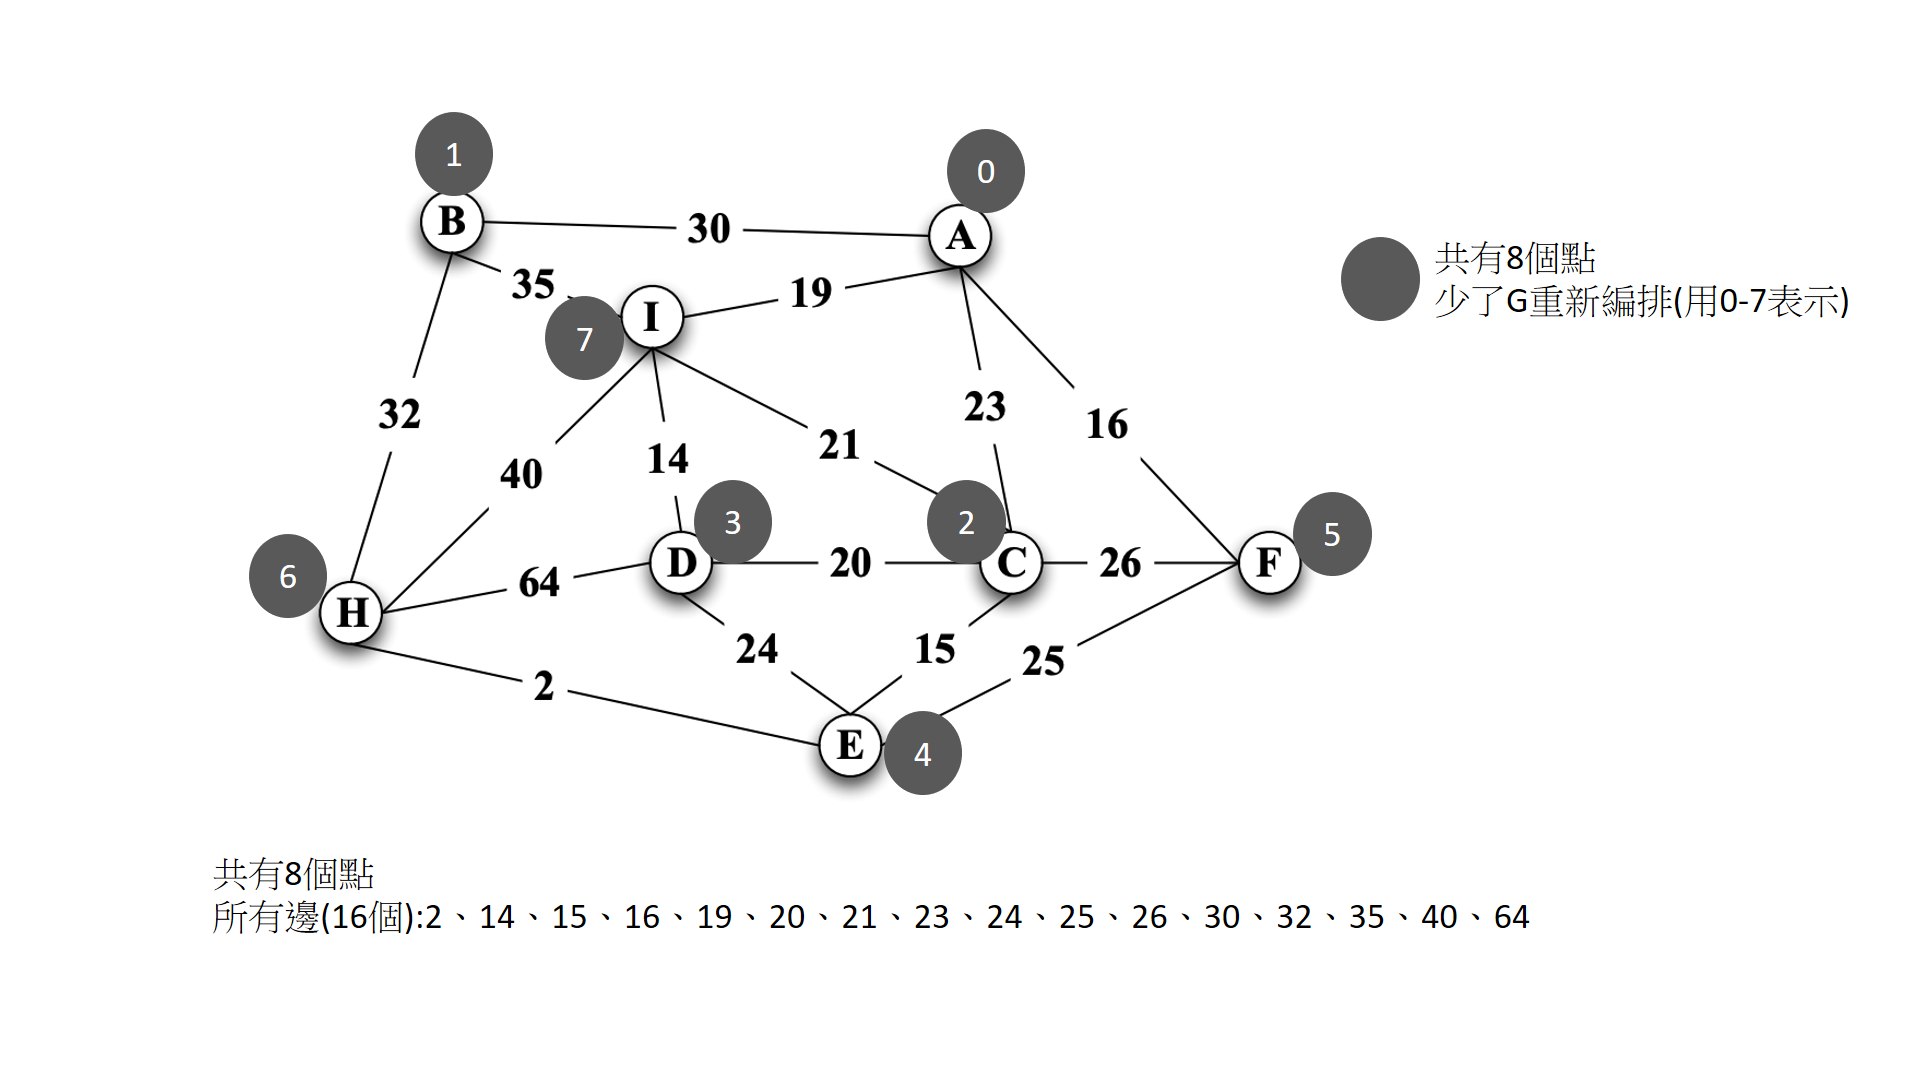





In [7]:
#程式

##python 排序
####依照長度排序



##（Kruskal’s algorithm)求最小生成樹
##參考:https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

# Python program for Kruskal's algorithm to find ##用Kruskal演算法
# Minimum Spanning Tree of a given connected,  ##給定連接的最小生成樹 找最小生成樹
# undirected and weighted graph ##無向圖

from collections import defaultdict

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = [] # default dictionary
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])  ##點u 點v u,v長度為w

	# A utility function to find set of an element i ##查找元素集i的實用函數
	# (uses path compression technique)
	def find(self, parent, i):
		if parent[i] == i:
			return i
		return self.find(parent, parent[i])

	# A function that does union of two sets of x and y ##一個將兩集合x和y進行聯集的函數
	# (uses union by rank)
	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[yroot] = xroot
			rank[xroot] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST
		
		# An index variable, used for sorted edges
		i = 0
		
		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in           ##1排好所有的邊
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph, 
							key=lambda item: item[2])    #########################
              ###key=lambda 元素: 元素[字段索引]
              ####例如：想對元素第二个字段排序，則###key=lambda y: y[1] 備註：这里y可以是任意字母，等同key=lambda x: x[1]
		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment ##2選擇最短的邊
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge does't         ##判斷是否有環
			# cause cycle, include it in result 
			# and increment the indexof result 
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print('依照順序寫出加入的每一個邊') 
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("最小生成樹" , minimumCost) ##印出最小生成樹

# Driver code

myg = Graph(8) ##共有7個點
##列出所有的邊(點1,點2,邊)
myg.addEdge(0, 1, 30)
myg.addEdge(0, 2, 23)
myg.addEdge(0, 5, 16)
myg.addEdge(0, 7, 19)

myg.addEdge(1, 6, 32)
myg.addEdge(1, 7, 35)

myg.addEdge(2, 3, 20)
myg.addEdge(2, 4, 15)
myg.addEdge(2, 5, 26)
myg.addEdge(2, 7, 21)

myg.addEdge(3, 4, 24)
myg.addEdge(3, 6, 64)
myg.addEdge(3, 7, 14)

myg.addEdge(4, 5, 25)
myg.addEdge(4, 6, 2)

myg.addEdge(6, 7, 40)


# Function call

print("----用Kruskal’s algorithm求最小生成樹-----")
myg.KruskalMST()
# This code is contributed by Neelam Yadav

----用Kruskal’s algorithm求最小生成樹-----
依照順序寫出加入的每一個邊
4 -- 6 == 2
3 -- 7 == 14
2 -- 4 == 15
0 -- 5 == 16
0 -- 7 == 19
2 -- 3 == 20
0 -- 1 == 30
最小生成樹 116


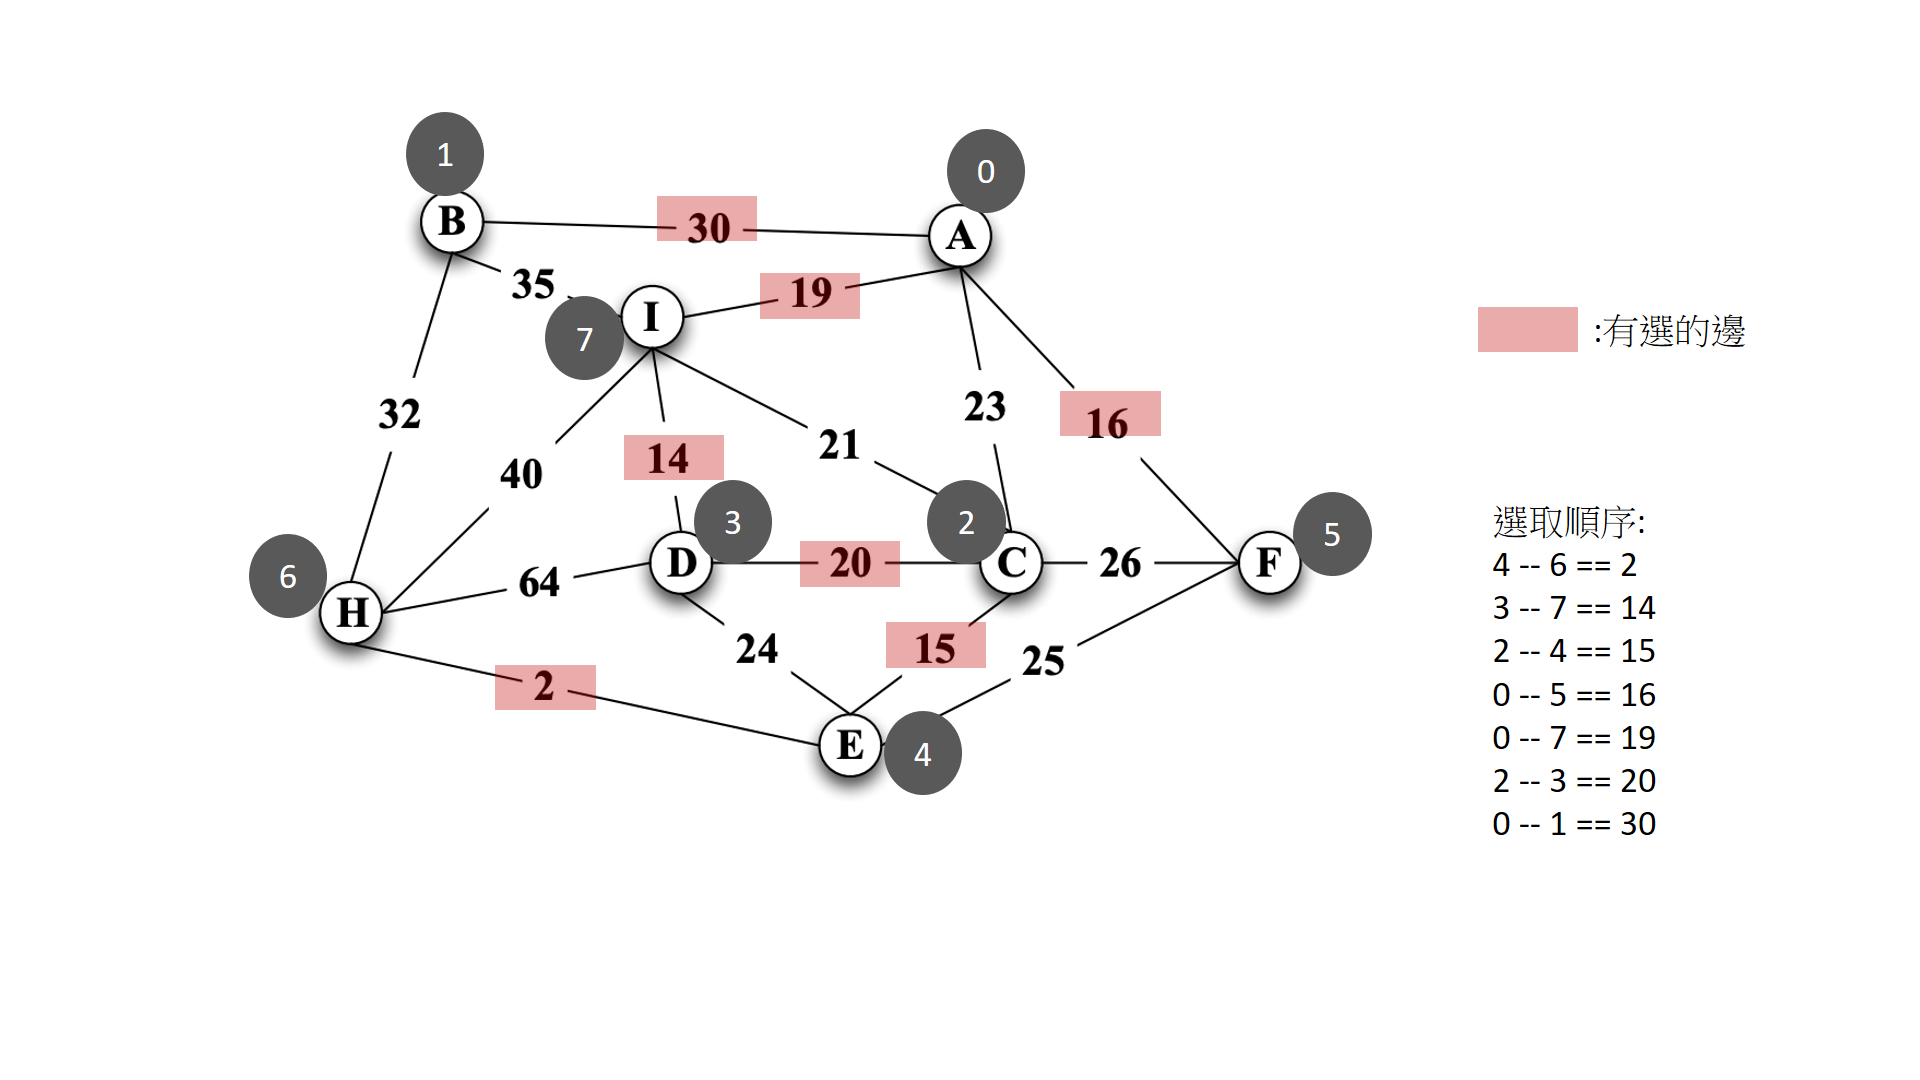